In [1]:
import hameg_trb 
import hameg_lv  
import phidrive
import micos_eco
import wallplugs
import numpy as np 
from matplotlib import pyplot as plt
# scope?

import time

#import ROOT
import os
from my_utils import *
#import fst
import scalers

def power_cycle_usb():
  wallplugs.a_off()
  time.sleep(3)
  wallplugs.a_on()
  time.sleep(3)
    
def power_cycle_micos():
  wallplugs.b_off()
  time.sleep(3)
  wallplugs.b_on()
  time.sleep(6)
  micos_eco.send_cmd("1 1 setaxis")
  micos_eco.send_cmd("1 2 setaxis")
  micos_eco.send_cmd("2.0 1 setpitch")
  micos_eco.send_cmd("2.0 2 setpitch")
  micos_eco.cal()
  time.sleep(3)
  print("micos eco pos :")
  print(micos_eco.pos())
    

In [2]:
print("### test micos ###")
print(micos_eco.pos())
print("\n")

print("### test phidrive ###")
print(phidrive.get_angle())
print("\n")

print("### test HAMEG TRB ###")
hameg_trb.report()
print("\n")

print("### test HAMEG lv ###")
hameg_lv.report()
print("\n")

### test micos ###
(80.0, 69.0, 0.0)


### test phidrive ###
0.0


### test HAMEG TRB ###
device: /dev/ttyUSB_HAMEG_TRB
volt 24.000000 curr 0.587700 state 1
volt 24.000000 curr 0.587700 state 1
volt 2.000000 curr 0.026500 state 1
volt 1.500000 curr 0.246800 state 1


### test HAMEG lv ###
device: /dev/ttyUSB_HAMEG_LV
volt 4.000000 curr 0.425100 state 1
volt 5.000000 curr 0.347700 state 1
volt 5.000000 curr 0.084000 state 1
volt 5.000000 curr 0.000000 state 1




In [3]:
print(micos_eco.pos())

(80.0, 69.0, 0.0)


In [4]:
#micos_eco.move(y=100,x=100) ## far side
#micos_eco.move(y=0,x=100) ## units in mm
#micos_eco.move(y=100,x=0) ## units in mm
#micos_eco.move(y=70,x=0) ## strahlhoehe
#micos_eco.move(x=0,y=0) ## parking pos

In [5]:


x_offset = 0
y_offset = 0

# if Si-Strip
x_offset = 50
y_offset = 30

In [6]:
#micos_eco.move(x=18,y=39) ## maximum of diamond rate in beam 
micos_eco.move(x=18+x_offset,y=39+y_offset) ## maximum of diamond rate in beam 

(68.44235, 69.0, 0.0)
(68.0, 69.0, 0.0)
done


In [7]:


X = np.arange(60, 90, 1)
#X = [18+x_offset]
#Y = np.arange(35+y_offset, 45+y_offset, 0.5)
Y = [39+y_offset]


rates = np.zeros(( len(Y) , len(X)))
dut_rates = np.zeros(( len(Y) , len(X)))
trigger_rates = np.zeros(( len(Y) , len(X)))

acq_time=5
trigger_rate_threshold=4000

#print(rates)

i=0
j=0
for y in Y:
  j=0
  for x in X:
    micos_eco.move(x=x,y=y)
    
    
    while True:
    
      curr_rates = scalers.scaler_rate("0x0351",[3,30],acq_time)
      scint_rate = curr_rates[1]
      dut_rate = curr_rates[0]
    
      print("pos: x: {:f} y: {:f}".format(x,y))
      print("scint_rate: {:f}".format(scint_rate))
      print("dut_rate: {:f}".format(dut_rate))
      print("dut/trigger rate: {:f}".format( dut_rate/(scint_rate+0.001)))
      
      if scint_rate > trigger_rate_threshold*acq_time:
        rates[i,j] = dut_rate/scint_rate
        dut_rates[i,j] = dut_rate
        trigger_rates[i,j] = scint_rate
        print("okay, next step")
        break
      else:
        print("spill break, measure again")
    
    j+=1
  i+=1

print("scan finished")

print(rates)

(60.0, 69.0, 0.0)
done
pos: x: 60.000000 y: 69.000000
scint_rate: 53454.000000
dut_rate: 4.000000
dut/trigger rate: 0.000075
okay, next step
(61.0, 69.0, 0.0)
done
pos: x: 61.000000 y: 69.000000
scint_rate: 367.000000
dut_rate: 0.000000
dut/trigger rate: 0.000000
spill break, measure again
pos: x: 61.000000 y: 69.000000
scint_rate: 1383.000000
dut_rate: 0.000000
dut/trigger rate: 0.000000
spill break, measure again
pos: x: 61.000000 y: 69.000000
scint_rate: 37974.000000
dut_rate: 11.000000
dut/trigger rate: 0.000290
okay, next step
(62.0, 69.0, 0.0)
done
pos: x: 62.000000 y: 69.000000
scint_rate: 71706.000000
dut_rate: 15.000000
dut/trigger rate: 0.000209
okay, next step
(63.0, 69.0, 0.0)
done
pos: x: 63.000000 y: 69.000000
scint_rate: 89591.000000
dut_rate: 8.000000
dut/trigger rate: 0.000089
okay, next step
(64.0, 69.0, 0.0)
done
pos: x: 64.000000 y: 69.000000
scint_rate: 92133.000000
dut_rate: 8.000000
dut/trigger rate: 0.000087
okay, next step
(65.0, 69.0, 0.0)
done
pos: x: 65.0000

saving to /workdir/jupyter/beam_profile_w_scalers_data/000.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/000.pickle


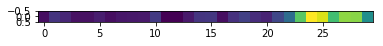

saving to /workdir/jupyter/beam_profile_w_scalers_data/001.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/001.pickle


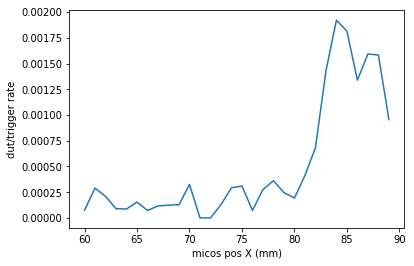

saving to /workdir/jupyter/beam_profile_w_scalers_data/002.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/002.pickle


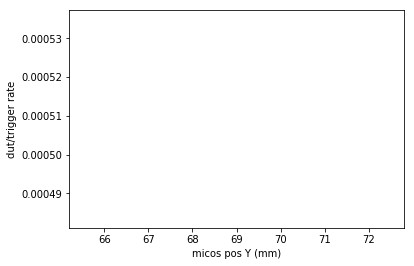

saving to /workdir/jupyter/beam_profile_w_scalers_data/relative_rates_matrix.pickle
saving to /workdir/jupyter/beam_profile_w_scalers_data/dut_rates_matrix.pickle
saving to /workdir/jupyter/beam_profile_w_scalers_data/trigger_rates_matrix.pickle
saving to /workdir/jupyter/beam_profile_w_scalers_data/X_mm.pickle
saving to /workdir/jupyter/beam_profile_w_scalers_data/Y_mm.pickle


In [8]:
clear_data_dir()

plt.imshow(rates)
show(plt)

plt.plot(X,sum(rates)/len(Y))
plt.xlabel("micos pos X (mm)")
plt.ylabel("dut/trigger rate")
show(plt)

plt.plot(Y,sum(rates.transpose())/len(X))
plt.xlabel("micos pos Y (mm)")
plt.ylabel("dut/trigger rate")
show(plt)

pickle_this(rates,"relative_rates_matrix")
pickle_this(dut_rates,"dut_rates_matrix")
pickle_this(trigger_rates,"trigger_rates_matrix")
pickle_this(X,"X_mm")
pickle_this(Y,"Y_mm")

In [9]:
#archive(label="Y_Si_76s")